<a href="https://colab.research.google.com/github/jalalbamniya/DataSet/blob/main/neural_network_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

# Building CNN - Convolutional Neural Network

###Project Fashion-Classification - End to End 

Train Convolutional Neural Network on 60,000 Fashion-MNIST Images (data in NP array)

Test Convolutional Neural Network on 10,000 Fashion-MNIST Images (data in NP array)

# Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns

In [4]:
#(x_train, y_train), (x_test, y_test) =keras.datasets.fashion_mnist.load_data()
import tensorflow.keras as tk
mnist = tk.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


# Load Data

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # load dataset from  keras

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
# Print shape of Data

X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [7]:
x_train[0]# image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0] #9 => Ankle boot

9

In [9]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

## Show image

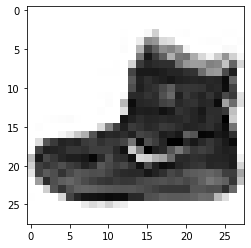

In [10]:
plt.imshow(X_train[0], cmap='Greys')

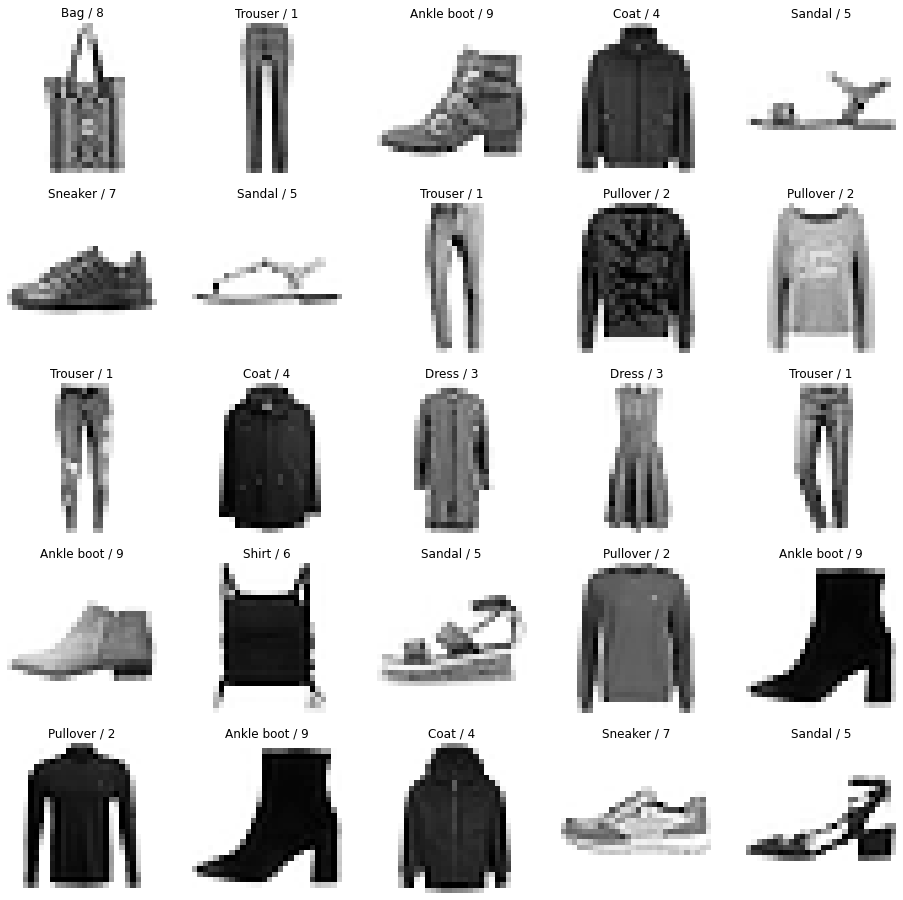

In [11]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

## Change Dimention

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train.ndim

3

In [14]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# ref: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

In [15]:
X_train.ndim

4

## Feature Scaling

In [16]:
X_train = X_train/255
X_test = X_test/255

## Split Dataset 

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [18]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

# Convolutional Neural Network - Model Building

In [19]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [20]:
cnn_model.summary() # get the summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [21]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 11s 18ms/step - loss: 0.6291 - accuracy: 0.7850 - val_loss: 0.4436 - val_accuracy: 0.8468
Epoch 2/10
94/94 [==============================] - 2s 17ms/step - loss: 0.3896 - accuracy: 0.8635 - val_loss: 0.3829 - val_accuracy: 0.8674
Epoch 3/10
94/94 [==============================] - 2s 16ms/step - loss: 0.3365 - accuracy: 0.8810 - val_loss: 0.3626 - val_accuracy: 0.8712
Epoch 4/10
94/94 [==============================] - 2s 16ms/step - loss: 0.3108 - accuracy: 0.8903 - val_loss: 0.3175 - val_accuracy: 0.8903
Epoch 5/10
94/94 [==============================] - 2s 16ms/step - loss: 0.2872 - accuracy: 0.8983 - val_loss: 0.3044 - val_accuracy: 0.8948
Epoch 6/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2691 - accuracy: 0.9045 - val_loss: 0.2991 - val_accuracy: 0.8946
Epoch 7/10
94/94 [==============================] - 1s 15ms/step - loss: 0.2554 - accuracy: 0.9090 - val_loss: 0.2941 - val_accuracy: 0.8971
Epoch 8/10
9

# Test the Model

In [23]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.09, 0.04, 0.  ]], dtype=float32)

In [24]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [25]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2789 - accuracy: 0.8978


[0.27885907888412476, 0.8978000283241272]

# Visualize output

In [26]:
"""plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off') """

"plt.figure(figsize=(16,16))\n\nj=1\nfor i in np.random.randint(0, 1000,25):\n  plt.subplot(5,5, j); j+=1\n  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')\n  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))\n  plt.axis('off') "

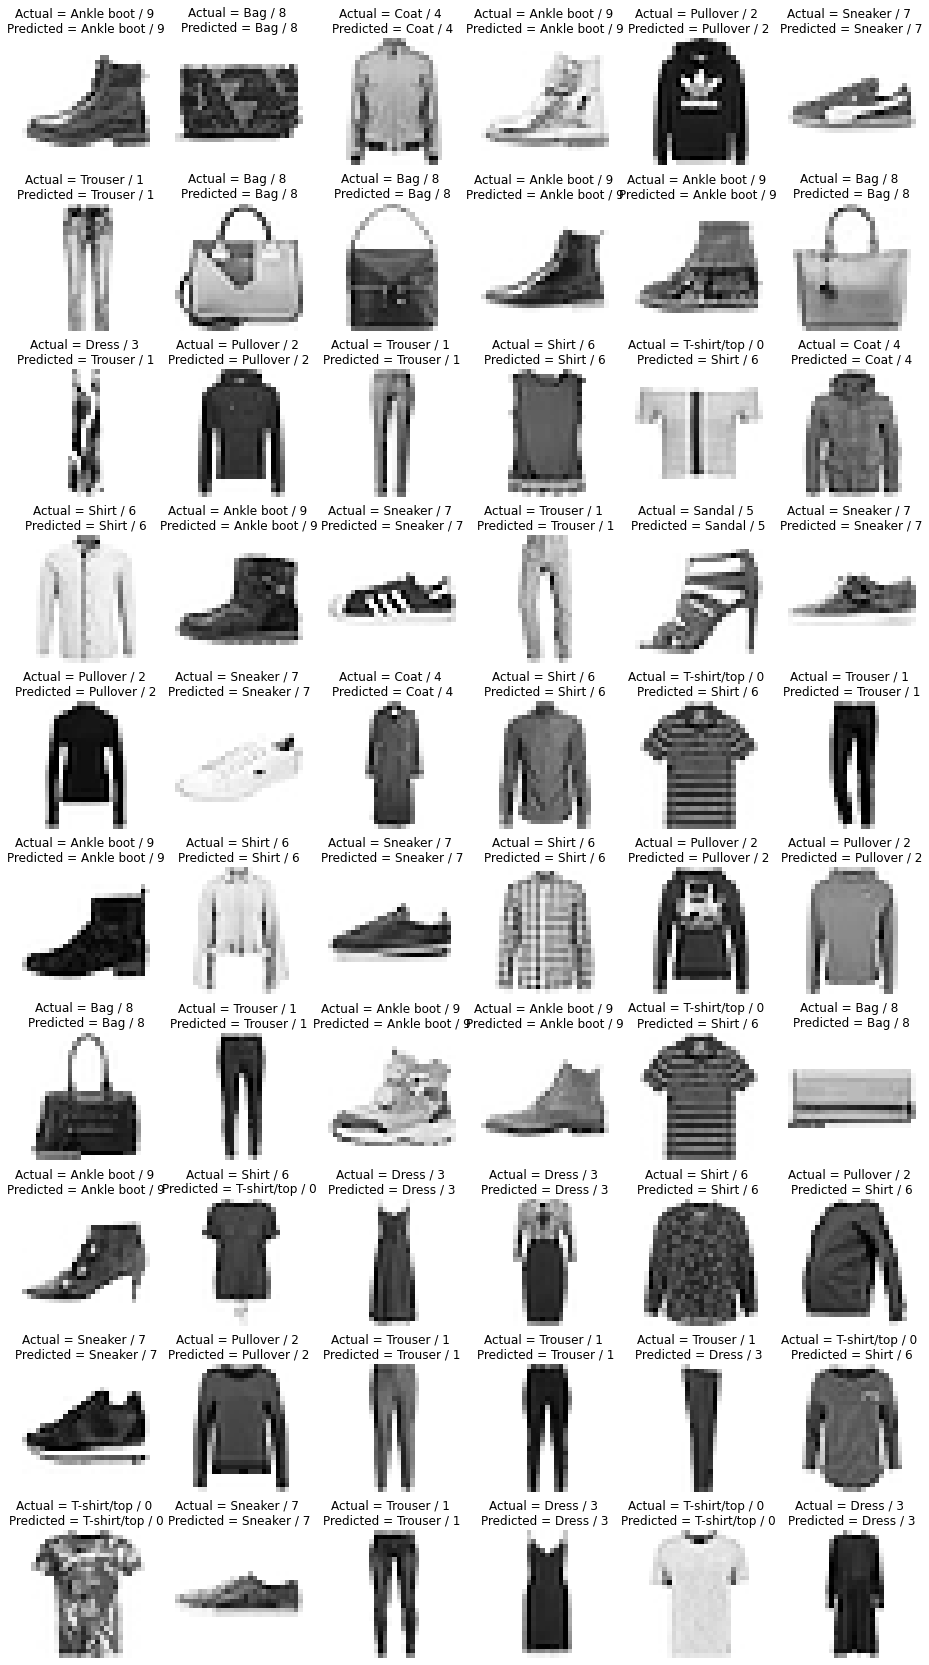

In [27]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

## Confusion Matrix

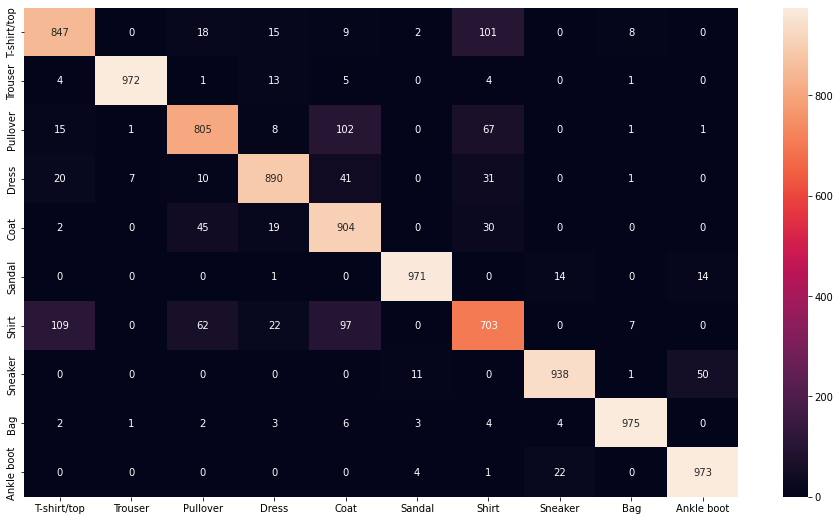

In [28]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [29]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.81      0.83      1000
       Dress       0.92      0.89      0.90      1000
        Coat       0.78      0.90      0.84      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.75      0.70      0.72      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Save Model

In [30]:
cnn_model.save('fashion_mnist_cnn_model.h5') # Save model

In [31]:
# Load model
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [32]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99]],
      dtype=float32)

In [33]:
np.argmax(Y_pred_sample[0])

9

In [34]:
y_test[0]

9

# Convolutional Neural Network - Building Complex Model

In [35]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [36]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 [==============================] - 3s 24ms/step - loss: 1.0046 - accuracy: 0.6242 - val_loss: 0.5646 - val_accuracy: 0.7863
Epoch 2/20
94/94 [==============================] - 2s 20ms/step - loss: 0.5462 - accuracy: 0.7950 - val_loss: 0.4647 - val_accuracy: 0.8239
Epoch 3/20
94/94 [==============================] - 2s 20ms/step - loss: 0.4592 - accuracy: 0.8304 - val_loss: 0.4033 - val_accuracy: 0.8508
Epoch 4/20
94/94 [==============================] - 2s 22ms/step - loss: 0.4078 - accuracy: 0.8492 - val_loss: 0.3677 - val_accuracy: 0.8606
Epoch 5/20
94/94 [==============================] - 2s 20ms/step - loss: 0.3720 - accuracy: 0.8644 - val_loss: 0.3495 - val_accuracy: 0.8697
Epoch 6/20
94/94 [==============================] - 2s 22ms/step - loss: 0.3449 - accuracy: 0.8740 - val_loss: 0.3272 - val_accuracy: 0.8787
Epoch 7/20
94/94 [==============================] - 2s 22ms/step - loss: 0.3281 - accuracy: 0.8790 - val_loss: 0.3082 - val_accuracy: 0.8840
Epoch 8/20
94

In [38]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

In [39]:
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [40]:
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 5s 44ms/step - loss: 1.2082 - accuracy: 0.5217 - val_loss: 0.6447 - val_accuracy: 0.7391
Epoch 2/50
94/94 [==============================] - 4s 39ms/step - loss: 0.6031 - accuracy: 0.7704 - val_loss: 0.4930 - val_accuracy: 0.8044
Epoch 3/50
94/94 [==============================] - 4s 39ms/step - loss: 0.4944 - accuracy: 0.8166 - val_loss: 0.4219 - val_accuracy: 0.8422
Epoch 4/50
94/94 [==============================] - 4s 39ms/step - loss: 0.4299 - accuracy: 0.8457 - val_loss: 0.3777 - val_accuracy: 0.8632
Epoch 5/50
94/94 [==============================] - 4s 39ms/step - loss: 0.3744 - accuracy: 0.8667 - val_loss: 0.3455 - val_accuracy: 0.8748
Epoch 6/50
94/94 [==============================] - 4s 39ms/step - loss: 0.3416 - accuracy: 0.8800 - val_loss: 0.3210 - val_accuracy: 0.8849
Epoch 7/50
94/94 [==============================] - 4s 39ms/step - loss: 0.3137 - accuracy: 0.8890 - val_loss: 0.3178 - val_accuracy: 0.8857
Epoch 8/50
94

In [42]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')

In [43]:
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4725 - accuracy: 0.9055


[0.47248753905296326, 0.9054999947547913]